# Kernel Density Estimation in Python: A Complete Guide
## What is Kernel Density Estimation?
Kernel Density Estimation (KDE) is a non-parametric method for estimating the probability density function of a random variable. Unlike histograms that use bins, KDE creates a smooth curve that represents the distribution of data by placing a kernel (a smooth, symmetric function) at each data point and summing them up.
Think of it as creating a smooth "hill" at each data point, then adding all those hills together to get a continuous estimate of the underlying distribution.
## Why Use KDE?
KDE offers several advantages:

- Smooth representation: No binning artifacts or discontinuities
- Better visualization: Easier to see the shape of the distribution
- Multiple modes: Clearly shows multimodal distributions
- Flexible: Works with any continuous data
- Comparison friendly: Easy to overlay multiple distributions

## Basic KDE with Scipy
Let's start with a simple implementation using Scipy's gaussian_kde:

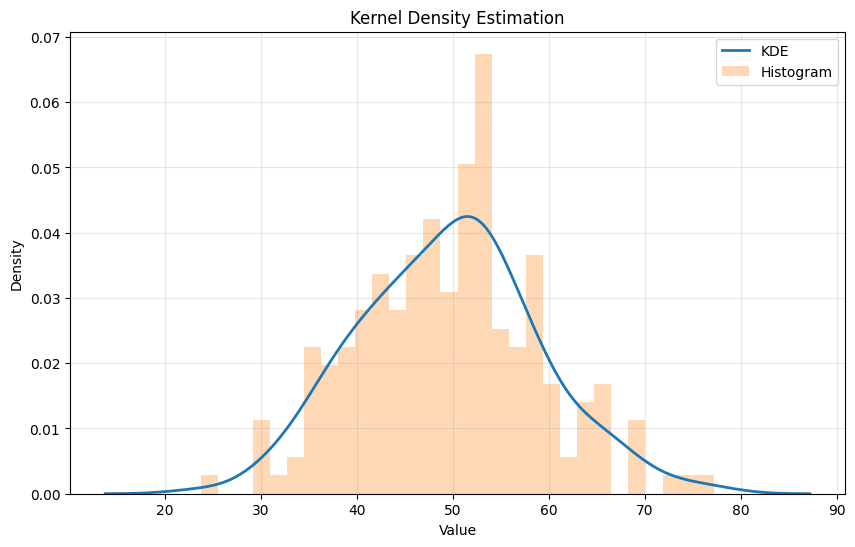

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Generate sample data
np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=200)

# Create KDE
kde = gaussian_kde(data)

# Generate points for smooth curve
x_range = np.linspace(data.min() - 10, data.max() + 10, 1000)
density = kde(x_range)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x_range, density, linewidth=2, label='KDE')
plt.hist(data, bins=30, density=True, alpha=0.3, label='Histogram')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Kernel Density Estimation')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# KDE with Seaborn
Seaborn provides a cleaner interface for KDE plots:

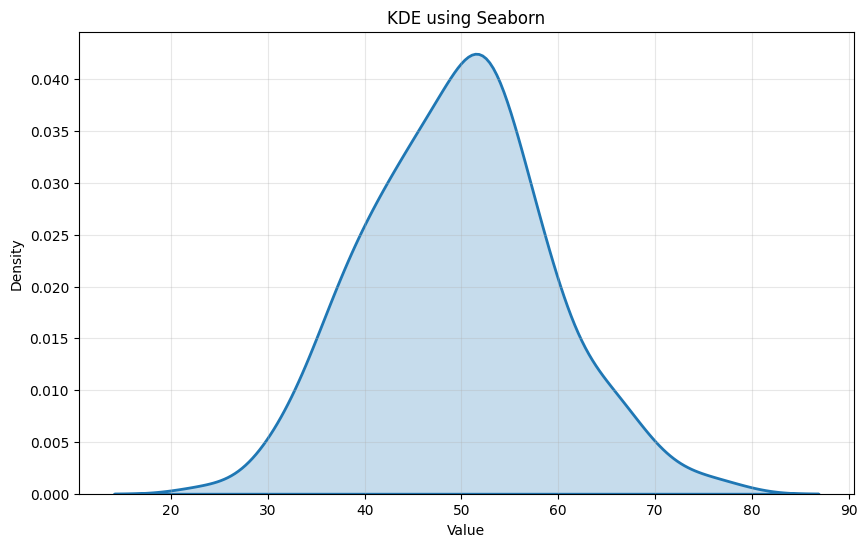

In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=200)

# Create KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, fill=True, linewidth=2)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('KDE using Seaborn')
plt.grid(True, alpha=0.3)
plt.show()

# Understanding Bandwidth
The bandwidth parameter controls the smoothness of the KDE. It's the most important parameter to understand:

## Key insights:

- Small bandwidth (0.1): Undersmoothed, captures too much noise
- Medium bandwidth (0.5-1.0): Good balance, captures true structure
- Large bandwidth (2.0): Oversmoothed, loses important details

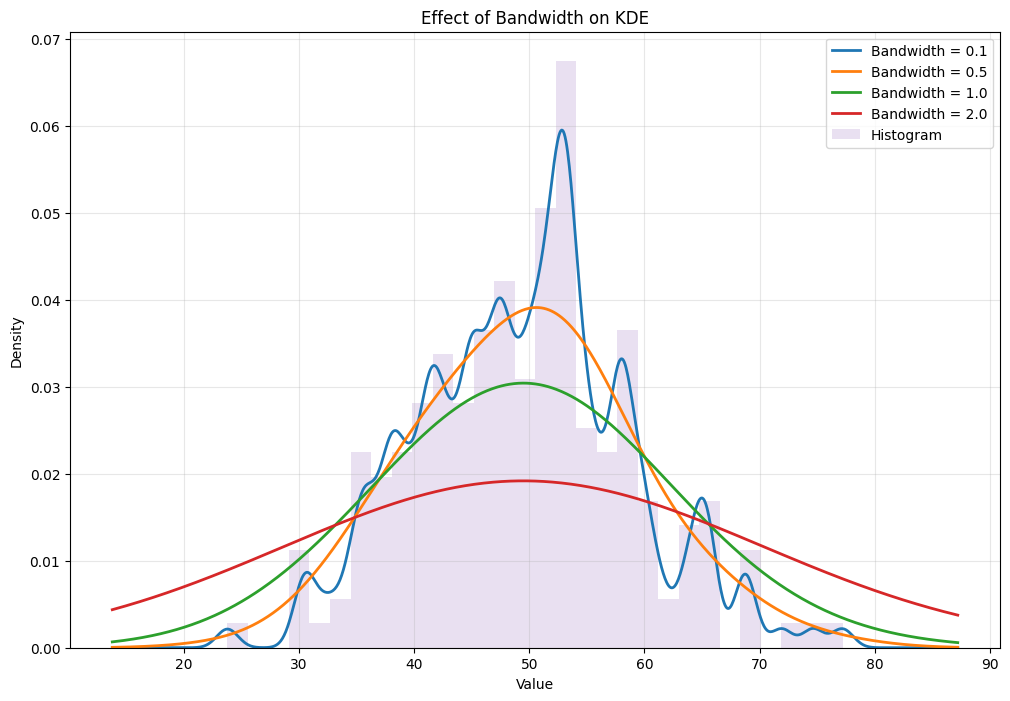

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Generate sample data
np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=200)

x_range = np.linspace(data.min() - 10, data.max() + 10, 1000)

# Different bandwidth factors
bandwidths = [0.1, 0.5, 1.0, 2.0]

plt.figure(figsize=(12, 8))
for bw in bandwidths:
    kde = gaussian_kde(data, bw_method=bw)
    density = kde(x_range)
    plt.plot(x_range, density, linewidth=2, label=f'Bandwidth = {bw}')

plt.hist(data, bins=30, density=True, alpha=0.2, label='Histogram')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Effect of Bandwidth on KDE')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Comparing Multiple Distributions
KDE excels at comparing distributions visually:

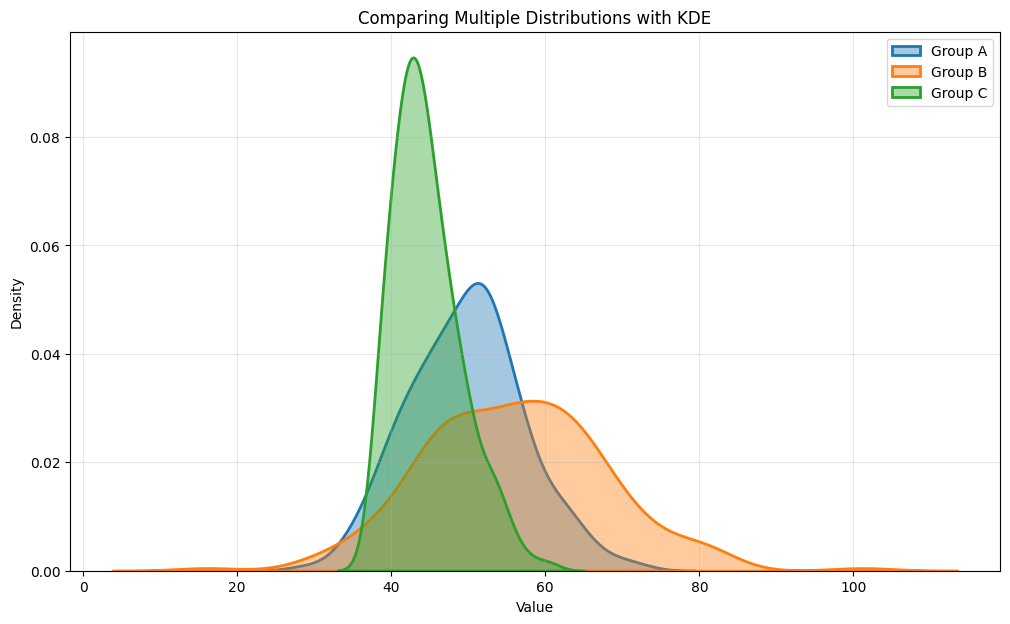

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate different distributions
np.random.seed(42)
group_a = np.random.normal(loc=50, scale=8, size=200)
group_b = np.random.normal(loc=55, scale=12, size=200)
group_c = np.random.gamma(shape=5, scale=2, size=200) + 35

plt.figure(figsize=(12, 7))
sns.kdeplot(data=group_a, fill=True, alpha=0.4, linewidth=2, label='Group A')
sns.kdeplot(data=group_b, fill=True, alpha=0.4, linewidth=2, label='Group B')
sns.kdeplot(data=group_c, fill=True, alpha=0.4, linewidth=2, label='Group C')

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Comparing Multiple Distributions with KDE')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Bivariate KDE (2D Density)
KDE can visualize the joint distribution of two variables:

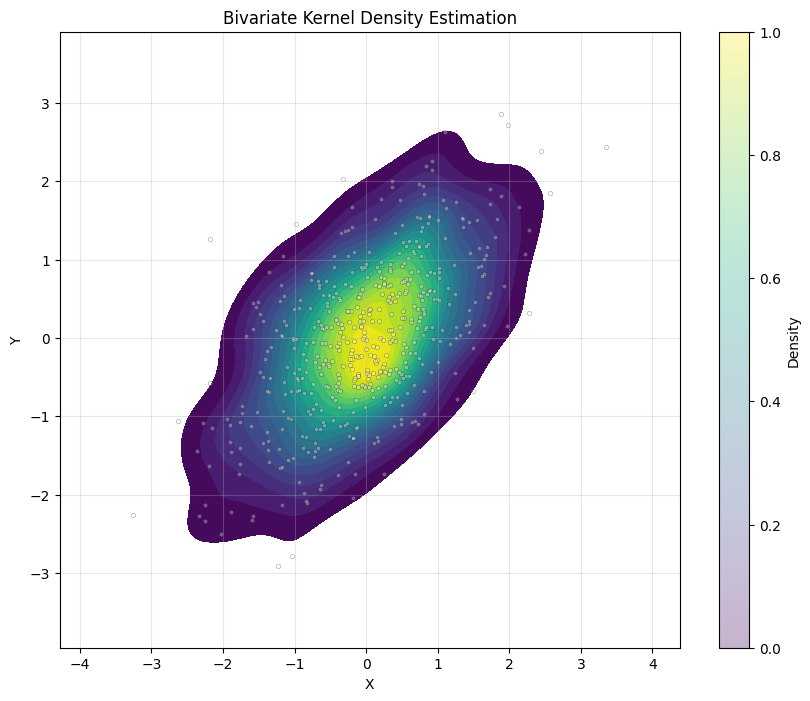

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate correlated bivariate data
np.random.seed(42)
mean = [0, 0]
cov = [[1, 0.6], [0.6, 1]]
x, y = np.random.multivariate_normal(mean, cov, size=500).T

# Create 2D KDE plot
plt.figure(figsize=(10, 8))
sns.kdeplot(x=x, y=y, fill=True, cmap='viridis', levels=20)
plt.scatter(x, y, alpha=0.3, s=10, color='white', edgecolors='black', linewidths=0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Bivariate Kernel Density Estimation')
plt.colorbar(label='Density')
plt.grid(True, alpha=0.3)
plt.show()

# Different Kernel Functions
While Gaussian is most common, other kernel functions can be used:

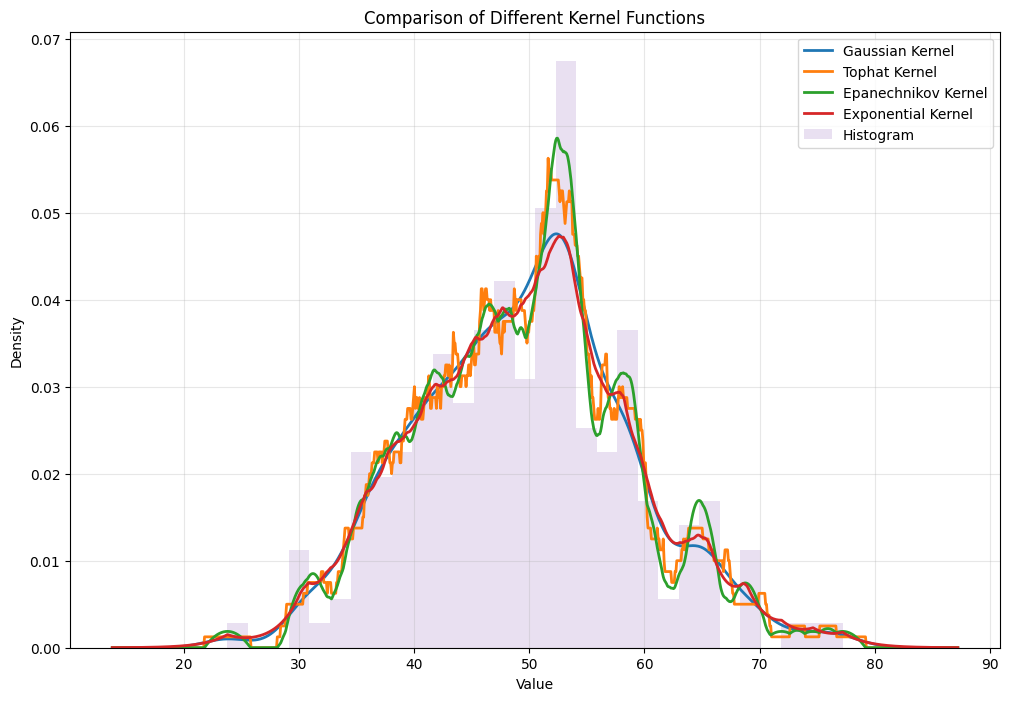

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from sklearn.neighbors import KernelDensity

# Generate sample data
np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=200)
x_range = np.linspace(data.min() - 10, data.max() + 10, 1000)

# Different kernels using sklearn
kernels = ['gaussian', 'tophat', 'epanechnikov', 'exponential']

plt.figure(figsize=(12, 8))

for kernel in kernels:
    kde_sklearn = KernelDensity(kernel=kernel, bandwidth=2.0)
    kde_sklearn.fit(data.reshape(-1, 1))
    log_density = kde_sklearn.score_samples(x_range.reshape(-1, 1))
    density = np.exp(log_density)
    plt.plot(x_range, density, linewidth=2, label=f'{kernel.capitalize()} Kernel')

plt.hist(data, bins=30, density=True, alpha=0.2, label='Histogram')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Comparison of Different Kernel Functions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Bandwidth Selection Methods
Choosing the right bandwidth is critical. Here are common methods:

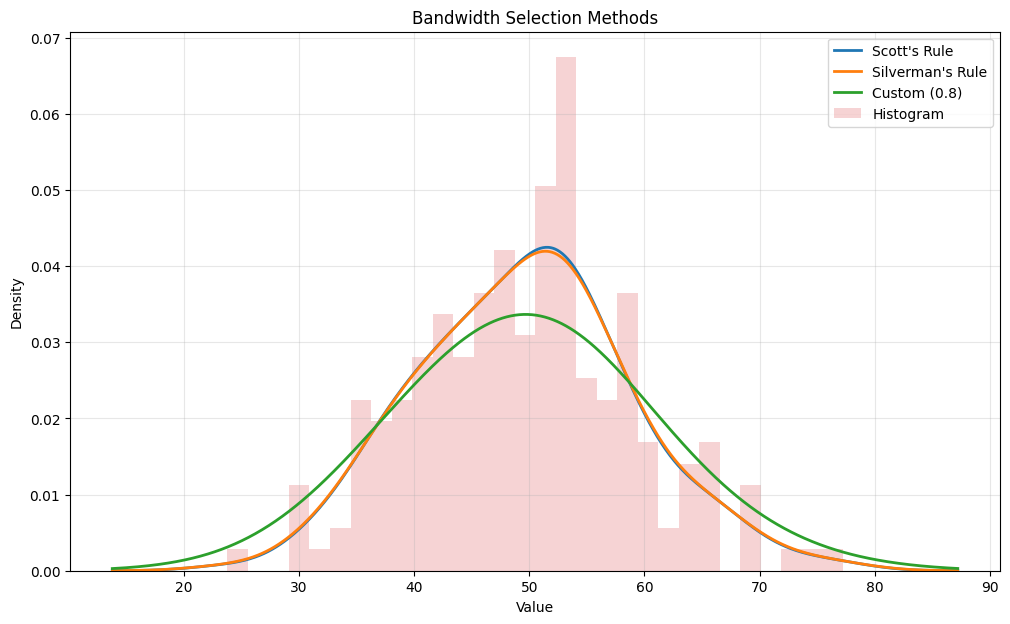

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KernelDensity

# Generate sample data
np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=200)

# Scott's Rule (built into scipy)
kde_scott = gaussian_kde(data, bw_method='scott')

# Silverman's Rule
kde_silverman = gaussian_kde(data, bw_method='silverman')

# Custom bandwidth
kde_custom = gaussian_kde(data, bw_method=0.8)

x_range = np.linspace(data.min() - 10, data.max() + 10, 1000)

plt.figure(figsize=(12, 7))
plt.plot(x_range, kde_scott(x_range), linewidth=2, label="Scott's Rule")
plt.plot(x_range, kde_silverman(x_range), linewidth=2, label="Silverman's Rule")
plt.plot(x_range, kde_custom(x_range), linewidth=2, label='Custom (0.8)')
plt.hist(data, bins=30, density=True, alpha=0.2, label='Histogram')

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Bandwidth Selection Methods')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Ridge Plot (Joy Plot) with KDE
Ridge plots show multiple KDE distributions stacked vertically:

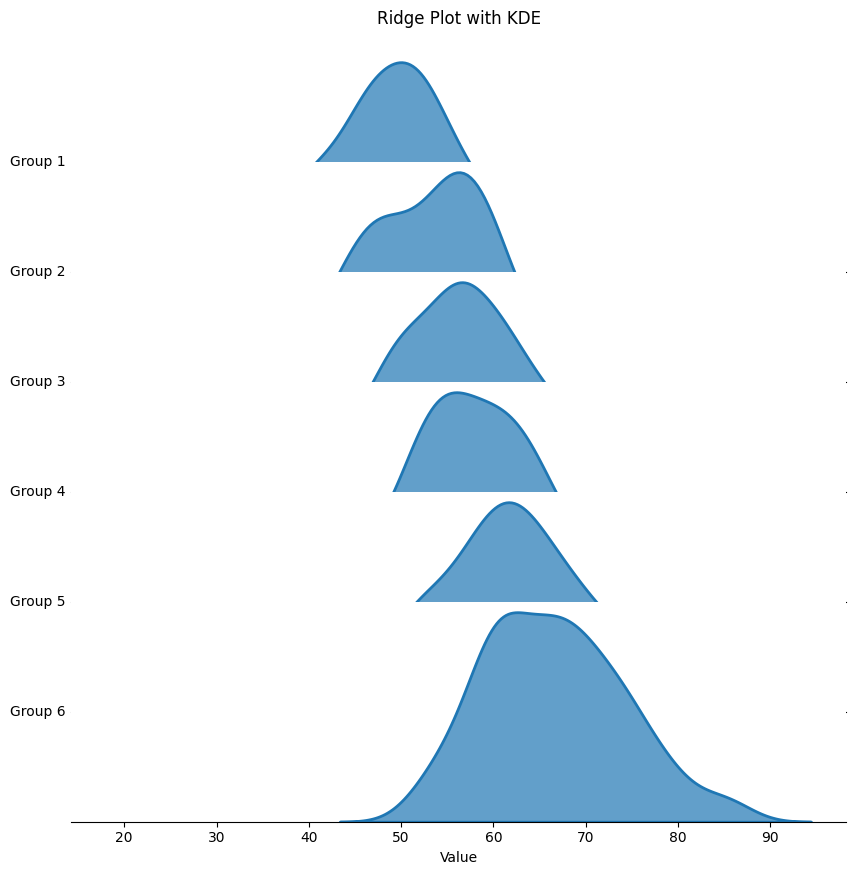

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate multiple groups
np.random.seed(42)
groups = []
labels = []
for i in range(6):
    data = np.random.normal(loc=50 + i*3, scale=8, size=150)
    groups.append(data)
    labels.append(f'Group {i+1}')

# Create ridge plot
fig, axes = plt.subplots(len(groups), 1, figsize=(10, 10), sharex=True)
fig.subplots_adjust(hspace=-0.5)

for ax, data, label in zip(axes, groups, labels):
    sns.kdeplot(data=data, fill=True, alpha=0.7, linewidth=2, ax=ax)
    ax.set_ylabel(label, rotation=0, ha='right', va='center')
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

axes[-1].set_xlabel('Value')
axes[0].set_title('Ridge Plot with KDE', pad=20)
plt.show()

# Practical Applications
1. Anomaly Detection
Regions with very low density can indicate outliers or anomalous observations.
2. Distribution Comparison
Easily compare treatment effects or group differences across entire distributions.
3. Feature Engineering
Use KDE to create density-based features for machine learning models.
4. Data Exploration
Quickly understand the shape, skewness, and modality of your data.

# KDE vs Histogram: When to Use Each
## Use KDE when:

- You want a smooth, continuous representation
- Comparing multiple distributions
- The exact shape matters more than counts
- Presenting to non-technical audiences

## Use Histogram when:

- You need exact counts in bins
- Working with discrete or categorical data
- Computational efficiency is critical
- The data has natural binning (e.g., age groups)

## Tips for Better KDE Plots

- Always show the data: Add rug plots or scatter points to show actual observations
- Choose bandwidth carefully: Too small captures noise, too large loses structure
- Consider sample size: KDE works best with 50+ observations
- Normalize when comparing: Use density=True to compare distributions with different sizes
- Test multiple bandwidths: Visualize with several bandwidth values to understand sensitivity